In [72]:
import os
import numpy as np
import pandas as pd
import time
import warnings
from matplotlib import pyplot as plt

from sklearn.neural_network import MLPClassifier
import sklearn.metrics
from sklearn.metrics import balanced_accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Data Preprocessing

Contents of train_x.csv: arr of shape (2102, 784)
Contents of valid_x.csv: arr of shape (600, 784)


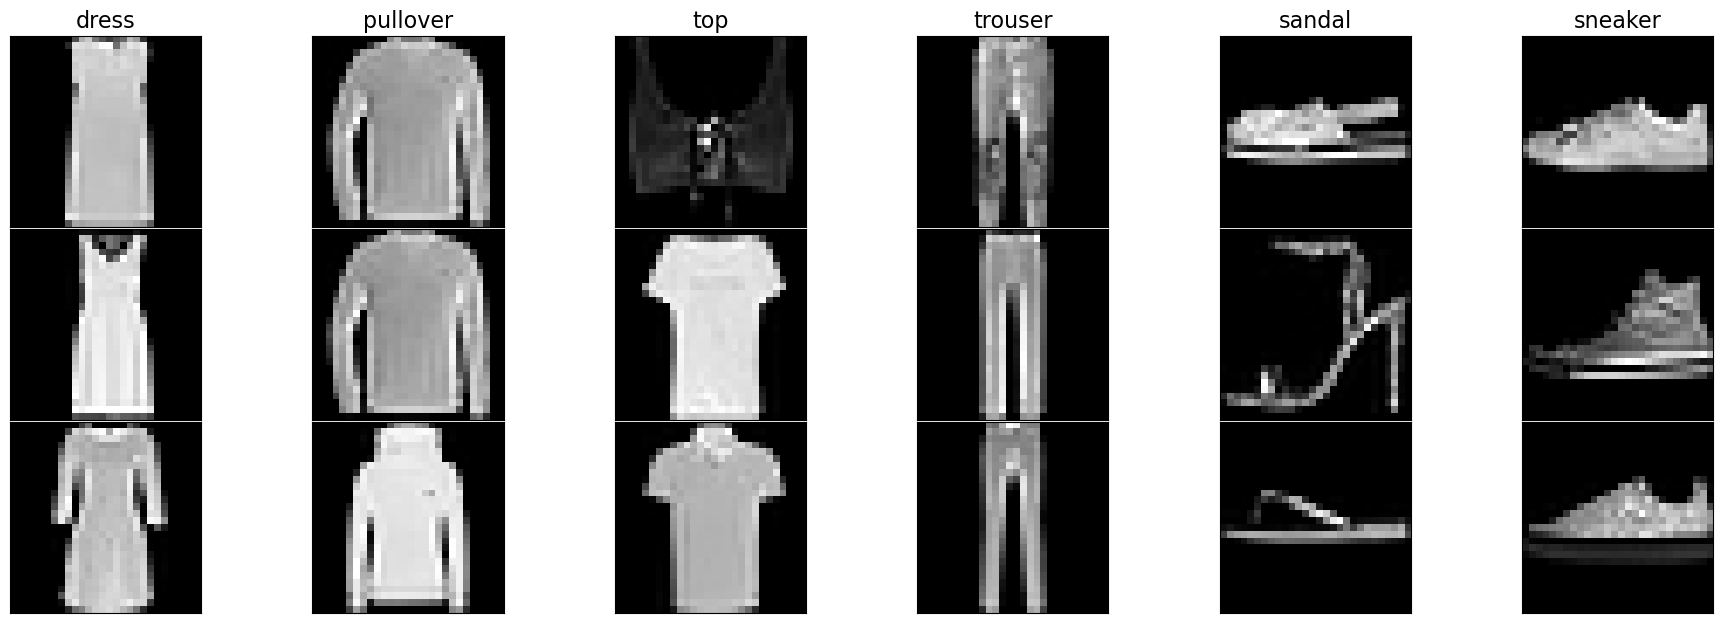

In [29]:
%run load_and_plot_data.py

In [30]:
train_y = np.array(train_y_df['class_uid'])
train_y.shape

(2102,)

In [31]:
train_x.shape, train_x[0].dtype

((2102, 784), dtype('int64'))

### Data Duplication

In [32]:
# selecting the tops and trousers
top_x = train_x[train_y == 0]
trouser_x = train_x[train_y == 1]
top_y = train_y[train_y == 0]
trouser_y = train_y[train_y == 1]

print(top_x.shape, trouser_x.shape)
print(top_y.shape, trouser_y.shape)

(1, 784) (1, 784)
(1,) (1,)


In [33]:
# selecting the dresses
dress_x = train_x[train_y == 3]
dress_y = train_y[train_y == 3]

In [34]:
# selecting pullovers
pullover_x = train_x[train_y == 2]
pullover_y = train_y[train_y == 2]

#### duplicating tops/trousers

In [35]:
# duplicated top and trouser arrays
top_x_array = np.tile(top_x, (1499, 1))
trouser_x_array = np.tile(trouser_x, (1199, 1))

top_y_array = np.tile(top_y, (1499))
trouser_y_array = np.tile(trouser_y, (1199))

print(top_x_array.shape, trouser_x_array.shape)
print(top_y_array.shape, trouser_y_array.shape)

(1499, 784) (1199, 784)
(1499,) (1199,)


#### Randomly Duplicating

In [36]:
#randomly duplicating dresses
dress_dupe_in = np.random.choice(len(dress_x), size = 400, replace = True)
#print(dress_duplicates_in)
dress_dupe_x = dress_x[dress_dupe_in]
dress_dupe_y = dress_y[dress_dupe_in]
#count = np.unique(dress_duplicates_x, return_counts = True)
#count

In [37]:
#randomly duplicating pullovers 
pull_dupe_in = np.random.choice(len(pullover_x), size = 700, replace = True)
#print(dress_duplicates_in)
pull_dupe_x = pullover_x[pull_dupe_in]
pull_dupe_y = pullover_y[pull_dupe_in]
#count = np.unique(dress_duplicates_x, return_counts = True)
#count
# dress_dupe_x.shape# 

In [11]:
# for not duplicating dresses
dress_dupe_x = dress_x
dress_dupe_y = dress_y

In [12]:
# for not duplicating pullovers
pull_dupe_x = pullover_x
pull_dupe_y = pullover_y

In [38]:
## Add tops
tempx = np.vstack((train_x, top_x_array))
print(tempx.shape)
tempy = np.hstack((train_y, top_y_array))

(3601, 784)


In [39]:
## Add Trousers
tempx = np.vstack((tempx, trouser_x_array))
print(tempx.shape)
tempy = np.hstack((tempy, trouser_y_array))

(4800, 784)


In [40]:
## Add Pullovers
tempx = np.vstack((tempx, pull_dupe_x))
print(tempx.shape)
tempy = np.hstack((tempy, pull_dupe_y))

(5500, 784)


In [41]:
## Add dresses
tempx = np.vstack((tempx, dress_dupe_x))
print(tempx.shape)
tempy = np.hstack((tempy, dress_dupe_y))

(5900, 784)


In [42]:
## Adding tops, trousers, and dresses to train_x
print(train_x.shape)
duplicated_train_x = tempx
duplicated_train_y = tempy
print(duplicated_train_x.shape, duplicated_train_y.shape)

(2102, 784)
(5900, 784) (5900,)


In [43]:
### Normalizing data

scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(duplicated_train_x)
normed_train_x = scaler.transform(duplicated_train_x)
normed_valid_x = scaler.transform(valid_x)
normed_train_x.shape

(5900, 784)

In [44]:
mlp = MLPClassifier(
            activation='relu',
            solver='lbfgs',
            learning_rate='adaptive', 
            momentum=0.0,
            tol=1e-5,
            early_stopping = True
            )

In [45]:
valid_y = np.array(valid_y_df['class_uid'])
valid_y.shape, duplicated_train_y.shape

((600,), (5900,))

### Best hyperparameters to get balanced accuracy on validation/test

Manual best parameter setting

In [76]:
man_params = {'alpha': 100,
              'hidden_layer_sizes': (50,),
              # 'learning_rate_init': 0.001,
              'max_iter': 15,
              'n_iter_no_change': 25,
              'random_state': 111}

In [69]:
# man_params = {'alpha': 100,
#     'hidden_layer_sizes': (128,),
#     'max_iter': 15,
#     'n_iter_no_change': 10,
#     'random_state': 139}

In [77]:
## Manual fit
best_mlp = mlp
best_mlp.set_params(**man_params)
best_mlp.fit(normed_train_x, duplicated_train_y)

C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=100, early_stopping=True, hidden_layer_sizes=(50,),
              learning_rate='adaptive', max_iter=15, momentum=0.0,
              n_iter_no_change=25, random_state=111, solver='lbfgs', tol=1e-05)

In [78]:
#normed_valid_x = sklearn.preprocessing.normalize(valid_x, norm = 'max', axis = 1)
pred_y = best_mlp.predict(normed_valid_x)
best_mlp_BAcc = balanced_accuracy_score(valid_y, pred_y)
best_mlp_BAcc

0.8966666666666668

### Confusion Matrix

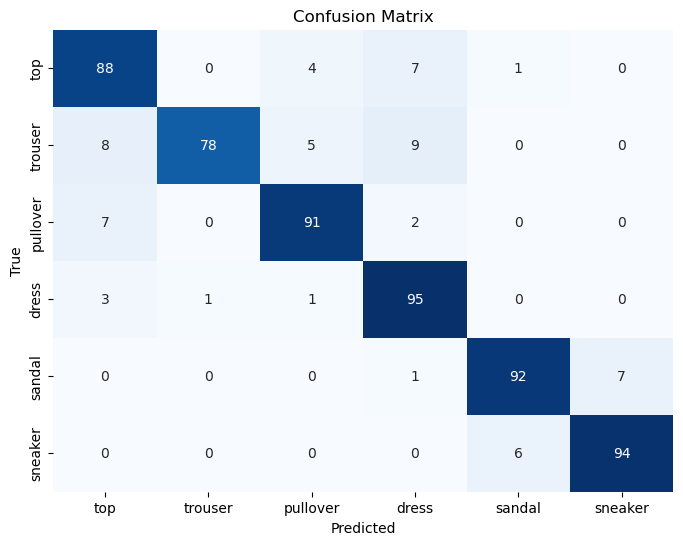

In [79]:
conf_matrix = confusion_matrix(valid_y, pred_y)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['top', 'trouser', 'pullover', 'dress', 'sandal', 'sneaker'],
            yticklabels=['top', 'trouser', 'pullover', 'dress', 'sandal', 'sneaker'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [80]:
test = best_mlp.predict(normed_train_x)
balanced_accuracy_score(duplicated_train_y, test)

0.953125

### Leaderboard

In [81]:
# Load the dataset of interest
datadir = os.path.abspath('data_fashion')
x_NF = np.loadtxt(os.path.join(datadir, 'x_test.csv'), 
                  delimiter=',', 
                  skiprows=1)

N = x_NF.shape[0]

In [83]:
normed_test_x = scaler.transform(x_NF)

In [84]:
yhat_pred_num = best_mlp.predict(normed_test_x)

In [85]:
yhat_pred_num

array([0, 1, 2, 0, 3, 2, 5, 0, 3, 5, 3, 2, 3, 5, 7, 3, 7, 7, 7, 1, 0, 3,
       2, 0, 2, 0, 3, 3, 2, 3, 2, 2, 3, 0, 3, 5, 3, 1, 0, 5, 2, 7, 3, 5,
       7, 3, 1, 1, 2, 3, 3, 2, 2, 3, 7, 7, 3, 3, 2, 2, 3, 2, 7, 5, 5, 3,
       2, 7, 7, 0, 2, 7, 3, 0, 5, 7, 0, 5, 0, 3, 1, 7, 0, 3, 3, 3, 2, 2,
       3, 0, 1, 3, 3, 3, 1, 3, 3, 3, 5, 7, 7, 3, 2, 0, 7, 2, 2, 0, 2, 5,
       7, 1, 3, 1, 5, 5, 0, 7, 1, 2, 0, 2, 0, 0, 2, 5, 5, 2, 1, 3, 7, 1,
       5, 0, 2, 5, 7, 5, 3, 2, 5, 7, 1, 5, 2, 7, 0, 2, 1, 5, 7, 7, 0, 2,
       5, 3, 3, 1, 2, 3, 3, 2, 2, 2, 3, 2, 2, 7, 2, 5, 5, 7, 2, 3, 1, 2,
       2, 2, 1, 1, 3, 0, 1, 7, 2, 5, 2, 0, 7, 7, 7, 7, 1, 7, 7, 0, 2, 0,
       2, 5, 3, 5, 7, 7, 1, 2, 5, 3, 3, 3, 5, 5, 0, 2, 0, 3, 5, 5, 2, 2,
       0, 7, 3, 2, 7, 7, 2, 0, 2, 2, 7, 2, 3, 5, 5, 1, 2, 5, 5, 3, 3, 7,
       0, 5, 0, 0, 2, 3, 5, 7, 0, 5, 0, 0, 5, 7, 7, 5, 5, 0, 0, 0, 0, 2,
       3, 1, 2, 5, 3, 2, 7, 0, 2, 0, 7, 7, 5, 1, 0, 3, 0, 5, 5, 5, 3, 2,
       7, 1, 5, 2, 5, 5, 0, 7, 7, 3, 7, 3, 1, 7, 0,

In [86]:
yhat_pred = yhat_pred_num.astype(str)
yhat_pred

array(['0', '1', '2', '0', '3', '2', '5', '0', '3', '5', '3', '2', '3',
       '5', '7', '3', '7', '7', '7', '1', '0', '3', '2', '0', '2', '0',
       '3', '3', '2', '3', '2', '2', '3', '0', '3', '5', '3', '1', '0',
       '5', '2', '7', '3', '5', '7', '3', '1', '1', '2', '3', '3', '2',
       '2', '3', '7', '7', '3', '3', '2', '2', '3', '2', '7', '5', '5',
       '3', '2', '7', '7', '0', '2', '7', '3', '0', '5', '7', '0', '5',
       '0', '3', '1', '7', '0', '3', '3', '3', '2', '2', '3', '0', '1',
       '3', '3', '3', '1', '3', '3', '3', '5', '7', '7', '3', '2', '0',
       '7', '2', '2', '0', '2', '5', '7', '1', '3', '1', '5', '5', '0',
       '7', '1', '2', '0', '2', '0', '0', '2', '5', '5', '2', '1', '3',
       '7', '1', '5', '0', '2', '5', '7', '5', '3', '2', '5', '7', '1',
       '5', '2', '7', '0', '2', '1', '5', '7', '7', '0', '2', '5', '3',
       '3', '1', '2', '3', '3', '2', '2', '2', '3', '2', '2', '7', '2',
       '5', '5', '7', '2', '3', '1', '2', '2', '2', '1', '1', '3

In [87]:
names = ['dress', 'pullover', 'top', 'trouser', 'sandal', 'sneaker']


In [88]:
yhat_pred[yhat_pred_num == 3] = names[0] # dress
yhat_pred[yhat_pred_num == 2] = names[1] # pullover
yhat_pred[yhat_pred_num == 0] = names[2] # top
yhat_pred[yhat_pred_num == 1] = names[3] # trouser
yhat_pred[yhat_pred_num == 5] = names[4] # sandal
yhat_pred[yhat_pred_num == 7] = names[5] # sneaker

yhat_pred

array(['top', 'trouser', 'pullover', 'top', 'dress', 'pullover', 'sandal',
       'top', 'dress', 'sandal', 'dress', 'pullover', 'dress', 'sandal',
       'sneaker', 'dress', 'sneaker', 'sneaker', 'sneaker', 'trouser',
       'top', 'dress', 'pullover', 'top', 'pullover', 'top', 'dress',
       'dress', 'pullover', 'dress', 'pullover', 'pullover', 'dress',
       'top', 'dress', 'sandal', 'dress', 'trouser', 'top', 'sandal',
       'pullover', 'sneaker', 'dress', 'sandal', 'sneaker', 'dress',
       'trouser', 'trouser', 'pullover', 'dress', 'dress', 'pullover',
       'pullover', 'dress', 'sneaker', 'sneaker', 'dress', 'dress',
       'pullover', 'pullover', 'dress', 'pullover', 'sneaker', 'sandal',
       'sandal', 'dress', 'pullover', 'sneaker', 'sneaker', 'top',
       'pullover', 'sneaker', 'dress', 'top', 'sandal', 'sneaker', 'top',
       'sandal', 'top', 'dress', 'trouser', 'sneaker', 'top', 'dress',
       'dress', 'dress', 'pullover', 'pullover', 'dress', 'top',
       'trous

In [89]:
np.savetxt('yhat_test.txt', yhat_pred, delimiter='\n', fmt='%s')